# Pohora.LK - Machine Learning for Fertilizer Recommendation

The **Pohora.LK** project uses machine learning to tackle a common agricultural problem - deciding which fertilizer must be applied to a crop, based on different variable factors and environmental conditions, such as soil nitrogen content, humidity etc.

This notebook will dive into a dataset available on [Kaggle](https://www.kaggle.com/datasets/shankarpriya2913/crop-and-soil-dataset), and use it to train a machine learning model that can be part of a larger application for farmers and agriculturists to use.

## 1. Getting Started

This notebook uses the following dependencies:

1. Jupyter - to run the notebook
2. Scikit-Learn - to build, train and evaluate machine learning models
3. NumPy - to handle numerical computations in the data
4. Pandas - to load and manipulate the data as required
5. Matplotlib - to perform various visualizations on the data

These dependencies can be installed with:

```sh
pip install jupyter scikit-learn numpy pandas matplotlib
```

**NOTE**: it is recommended to create a Python virtual environment in your project folder before installing the above.

After installing the above dependencies, use the following command to start a Jupyter server and run this notebook:

```sh
jupyter notebook

# or

python -m jupyter notebook
```

In [1]:
# Import dependencies

import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

Next, we can load the dataset from the CSV file as a Pandas **dataframe**.

In [2]:
# Load data from CSV file into a dataframe named `df`
df = pd.read_csv("../data/fertilizer.csv")

# Inspect the first 5 elements (a.k.a the head) of the dataframe
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '../data/fertilizer.csv'

At a glance, we can see that the dataset contains the following columns of data:

1. **Temparature** - the surrounding temperature of the crop (feature variable)
2. **Humidity** - the surrounding humidity of the crop (feature variable)
3. **Moisture** - the moisture in the crop's soil (feature variable)
4. **Soil Type** - the type of soil the crop has been planted in (feature variable)
5. **Crop Type** - the type of crop planted (feature variable)
6. **Nitrogen** - the nitrogen content of the soil (feature variable)
7. **Potassium** - the potassium content of the soil (feature variable)
8. **Phosphorous** - the phosphorous content of the soil (feature variable)
9. **Fertilizer Name** - the name of the fertilizer recommended for the application (target variable)

Before we begin analyzing the dataset, we'll first rename the `Temparature` column to fix the typo in it.

In [19]:
# Fix typo in `Temparature` column
df.rename(
    columns={"Temparature": "Temperature"},
    errors="raise",
    inplace=True,
)

df.head()

,Temperature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26.0,52.0,38.0,Sandy,Maize,37,0,0,Urea
1,29.0,52.0,45.0,Loamy,Sugarcane,12,0,36,DAP
2,34.0,65.0,62.0,Black,Cotton,7,9,30,14-35-14
3,32.0,62.0,34.0,Red,Tobacco,22,0,20,28-28
4,28.0,54.0,46.0,Clayey,Paddy,35,0,0,Urea


Now, we can get started with **Exploratory Data Analysis (EDA)**.

## 2. Exploratory Data Analysis

Here, we will inspect the dataset in close detail, to check for skewness, missing values and more.

First, we'll retrieve an overview of the complete dataset using `df.info()`.

In [20]:
# Get overview of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temperature      8000 non-null   float64
 1   Humidity         8000 non-null   float64
 2   Moisture         8000 non-null   float64
 3   Soil Type        8000 non-null   object 
 4   Crop Type        8000 non-null   object 
 5   Nitrogen         8000 non-null   int64  
 6   Potassium        8000 non-null   int64  
 7   Phosphorous      8000 non-null   int64  
 8   Fertilizer Name  8000 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 562.6+ KB


We can also get a statistical summary of the dataset using `df.describe()` to get an idea of the statistical properties (mean, standard deviation etc.) for each variable in the dataset.

In [21]:
# Get statistical summary of dataset
df.describe()

,Temperature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,30.338895,59.210731,43.580862,18.429125,3.916375,18.512500
std,4.478262,8.177366,12.596156,11.852406,5.494807,13.244113
min,20.000000,40.020000,20.000000,0.000000,0.000000,0.000000
25%,27.050000,53.277500,33.967500,9.000000,0.000000,8.000000
50%,30.240000,59.110000,42.250000,14.000000,1.000000,18.000000
75%,33.460000,65.082500,52.950000,26.000000,5.000000,30.000000
max,40.000000,80.000000,70.000000,46.000000,23.000000,46.000000


From the above overview, we can clearly see that there are **8000 samples** in the dataset, and none of the columns have any null values, which can be confirmed further.

In [22]:
# Confirm absence of missing values in data

# Iterate over each column of the dataframe
for column in df.columns:
    # Retrieve null count for particular column
    null_count = df[column].isnull().sum()

    # Display result
    print(f"Number of null values in {column} column: {null_count}")

Number of null values in Temperature column: 0
Number of null values in Humidity column: 0
Number of null values in Moisture column: 0
Number of null values in Soil Type column: 0
Number of null values in Crop Type column: 0
Number of null values in Nitrogen column: 0
Number of null values in Potassium column: 0
Number of null values in Phosphorous column: 0
Number of null values in Fertilizer Name column: 0


Thus, we don't have to worry about handling missing values in our data.

Next, let's inspect the columns having `object` data type, i.e.

1. Soil Type
2. Crop Type
3. Fertilizer

To see what unique values they have, by using the `unique()` method.

In [23]:
# Check unique values of categorical data

# Iterate over each column of the dataframe
for column in df.columns:
    if df[column].dtype == "object":
        # Retrieve list of unique values for particular column
        unique_values = df[column].unique()
    
        # Display result
        print(f"Unique values of {column} column: {unique_values}")

Unique values of Soil Type column: ['Sandy' 'Loamy' 'Black' 'Red' 'Clayey']
Unique values of Crop Type column: ['Maize' 'Sugarcane' 'Cotton' 'Tobacco' 'Paddy' 'Barley' 'Wheat' 'Millets'
 'Oil seeds' 'Pulses' 'Ground Nuts']
Unique values of Fertilizer Name column: ['Urea' 'DAP' '14-35-14' '28-28' '17-17-17' '20-20' '10-26-26']


Next, we can start visualizing the data. This can help us identify skewness, class imbalances etc. in our dataset.

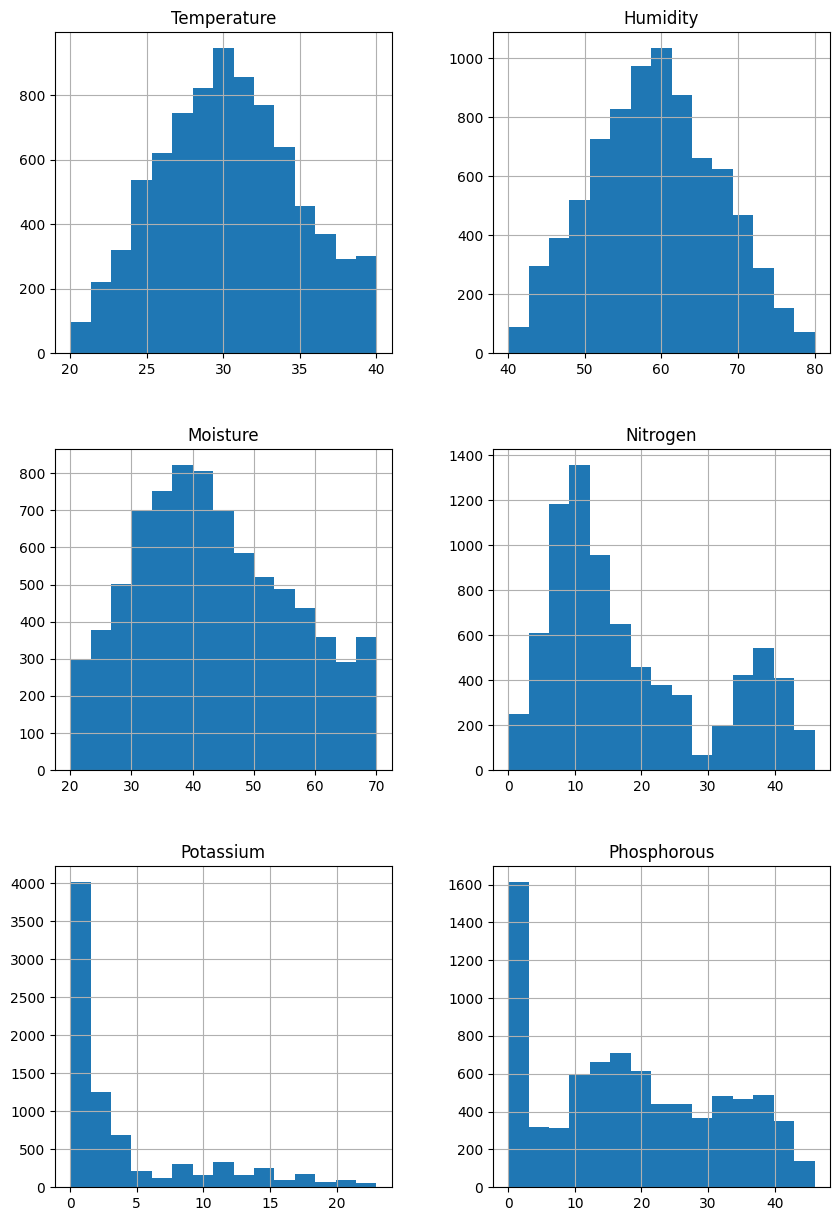

In [24]:
# Draw histograms for continuous data in dataset
df.hist(
    figsize=(10,15),
    bins=15,
)

plt.show()

Additionally, we can also check for **class imbalances** similarly using a histogram of the target variable `Fertilizer Name`.

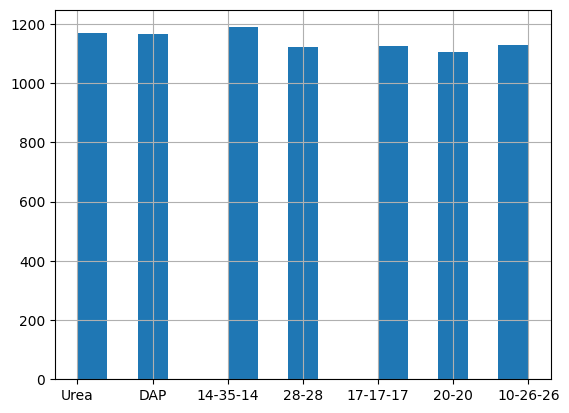

In [25]:
# Check for class imbalances via histogram
df["Fertilizer Name"].hist(
    bins=15,
)

plt.show()

Based on the above visualization, we can conclude that there doesn't seem to be any significant class imbalance in our dataset.

Next, we can inspect our dataset's continuous variables (variables of data type `int64`, `float64` etc.) for outliers.

For this, we can use the **inter-quartile range (IQR)**. The inter-quartile range is a common measure of statistical dispersion in datasets. It is the difference between the 25th percentile and 75th percentile of the data. It is used along with a **threshold value** (usually 1.5) to identify outliers outside a particular range, i.e. any value in the data that is either

1. Under 1.5 * IQR below the 25th percentile, or
2. Above 1.5 * IQR above the 75th percentile

can be considered as an outlier.

In [26]:
# Define threshold value for identifying outliers
threshold = 1.5

# Iterate over the columns in the dataset
for column in df.columns:
    # Select columns that do not contain categorical data
    if df[column].dtype != "object":
        # Get first quartile
        Q1 = df[column].quantile(0.25)
        
        # Get third quartile
        Q3 = df[column].quantile(0.75)

        # Get IQR of particular column
        IQR = Q3 - Q1

        # Identify outliers
        outliers = df[((df[column] < Q1 - threshold * IQR) | (df[column] > Q3 + threshold * IQR))]

        # NOTE
        # `outliers` itself is a dataframe. Therefore, to get the number of rows
        # that are outliers, we can use `len(outliers)`
        
        print(f"Outliers for {column}: {len(outliers)}")

Outliers for Temperature: 0
Outliers for Humidity: 0
Outliers for Moisture: 0
Outliers for Nitrogen: 0
Outliers for Potassium: 910
Outliers for Phosphorous: 0


Here, we can notice that outliers are only found in the `Potassium` column of the dataset. We can check what range of values these outliers belong to as well.

In [27]:
# Get first quartile for `Potassium` column
Q1 = df["Potassium"].quantile(0.25)

# Get third quartile for `Potassium` column
Q3 = df["Potassium"].quantile(0.75)

# Get IQR for `Potassium` column
IQR = Q3 - Q1

# Get outlier values of `Potassium` content
outliers_potassium = df[(df["Potassium"] < Q1 - threshold * IQR) | (df["Potassium"] > Q3 + threshold * IQR)]

print(f"Smallest outlier value in `Potassium` column: {outliers_potassium.min()["Potassium"]}")
print(f"Largest outlier value in `Potassium` column: {outliers_potassium.max()["Potassium"]}")

Smallest outlier value in `Potassium` column: 13
Largest outlier value in `Potassium` column: 23


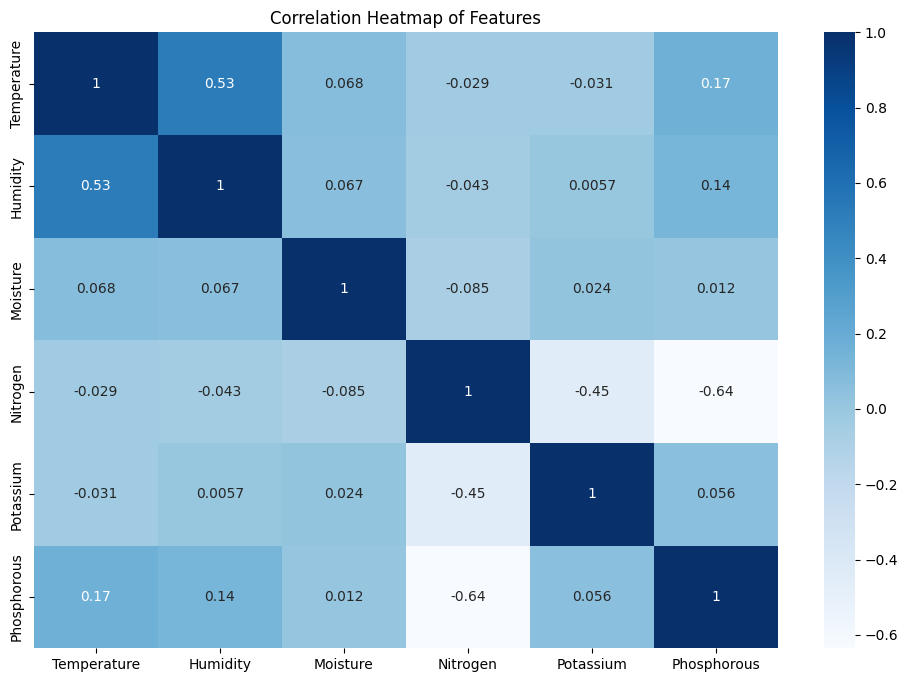

In [28]:
# Draw correlation heatmap

corr = df.select_dtypes("number").corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr,
    cmap="Blues", 
    annot=True,
)
plt.title("Correlation Heatmap of Features")
plt.show()

## 3. Data Preprocessing

After exploratory data analysis is completed, we can proceed with **preprocessing the data**.

Since `Fertilizer Name` is the target variable of our data, we can perform **label encoding** on it to encode them into numerical representations for the model to understand.

In [29]:
# Initialize label encoder
label_encoder = LabelEncoder()

# Encode the `Fertilizer Name` column
df["Fertilizer Name"] = label_encoder.fit_transform(df["Fertilizer Name"])

df

,Temperature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26.00,52.00,38.00,Sandy,Maize,37,0,0,6
1,29.00,52.00,45.00,Loamy,Sugarcane,12,0,36,5
2,34.00,65.00,62.00,Black,Cotton,7,9,30,1
3,32.00,62.00,34.00,Red,Tobacco,22,0,20,4
4,28.00,54.00,46.00,Clayey,Paddy,35,0,0,6
...,...,...,...,...,...,...,...,...,...
7995,35.30,59.61,44.25,Loamy,Oil seeds,10,14,10,6
7996,39.39,71.67,49.34,Black,Barley,35,0,0,0
7997,35.79,67.64,45.04,Red,Barley,41,0,0,6
7998,37.78,73.38,36.03,Black,Tobacco,10,3,30,5


For the `Soil Type` and `Crop Type` variables, we can use **one-hot encoding**.

In [30]:
# Initialize one-hot encoder
encoder = OneHotEncoder(
    drop="first",
    sparse_output=False,
)

# Encode the `Soil Type` and `Crop Type` columns
encoded_cols = encoder.fit_transform(df[["Soil Type", "Crop Type"]])

# Convert encoded columns into a Pandas dataframe
encoded_df = pd.DataFrame(
    encoded_cols,
    columns=encoder.get_feature_names_out(["Soil Type", "Crop Type"])
)

# Drop redundant columns from original dataframe and concatenate with new dataframe
df = df.drop(["Soil Type", "Crop Type"], axis=1)
df = pd.concat([df, encoded_df], axis=1)

df

,Temperature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Fertilizer Name,Soil Type_Clayey,Soil Type_Loamy,Soil Type_Red,...,Crop Type_Cotton,Crop Type_Ground Nuts,Crop Type_Maize,Crop Type_Millets,Crop Type_Oil seeds,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat
0,26.00,52.00,38.00,37,0,0,6,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,29.00,52.00,45.00,12,0,36,5,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,34.00,65.00,62.00,7,9,30,1,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,32.00,62.00,34.00,22,0,20,4,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,28.00,54.00,46.00,35,0,0,6,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,35.30,59.61,44.25,10,14,10,6,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7996,39.39,71.67,49.34,35,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7997,35.79,67.64,45.04,41,0,0,6,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7998,37.78,73.38,36.03,10,3,30,5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
